In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
raw = pd.read_csv("https://raw.githubusercontent.com/rhuanca/sample-data-sets/main/MARITAL_STATUS_SAMPLE.csv") \
  .rename(columns={'Country or area':'Country Code'})

raw['AgeGroup'] = raw['AgeGroup'].astype(str)

raw

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Country Code,ISO code,YearStart,YearEnd,Sex,MaritalStatus,Non-standard_AgeGroups,Series_contains_Non-standard_AgeGroups,AgeGroup,AgeStart,...,DataCatalog ShortName,DataCatalog ID,DataCatalog LongName,Data Source,Including_consensual_unions,Note on Age groups,Note on Marital Status,Note on Data,Note on Country and Population,Note Other
0,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[15-19],15,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[20-24],20,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[25-29],25,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[30-34],30,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[35-39],35,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51784,Costa Rica,188,2018,2018,Women,Widowed,NaN,NaN,[55-59],55,...,2018 Estimate,2075,Costa Rica 2018 Estimate,UNSD,NaN,NaN,NaN,NaN,NaN,NaN
51785,Costa Rica,188,2018,2018,Women,Widowed,NaN,NaN,[60-64],60,...,2018 Estimate,2075,Costa Rica 2018 Estimate,UNSD,NaN,NaN,NaN,NaN,NaN,NaN
51786,Costa Rica,188,2018,2018,Women,Widowed,NaN,NaN,[65-69],65,...,2018 Estimate,2075,Costa Rica 2018 Estimate,UNSD,NaN,NaN,NaN,NaN,NaN,NaN
51787,Costa Rica,188,2018,2018,Women,Widowed,NaN,NaN,[70-74],70,...,2018 Estimate,2075,Costa Rica 2018 Estimate,UNSD,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw.columns

Index(['Country Code', 'ISO code', 'YearStart', 'YearEnd', 'Sex',
       'MaritalStatus', 'Non-standard_AgeGroups',
       'Series_contains_Non-standard_AgeGroups', 'AgeGroup', 'AgeStart',
       'AgeEnd', 'DataValue', 'DataProcess', 'DataCatalog ShortName',
       'DataCatalog ID', 'DataCatalog LongName', 'Data Source',
       'Including_consensual_unions', 'Note on Age groups',
       'Note on Marital Status', 'Note on Data',
       'Note on Country and Population', 'Note Other'],
      dtype='object')

In [ ]:
raw['Country Code'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica'], dtype=object)

In [ ]:
countries = ['China']

marital_status = raw[raw['Country Code'].isin(countries)]
marital_status = marital_status[['Country Code', 'Sex', 'MaritalStatus', 'AgeGroup', 'YearStart', 'YearEnd', 'DataValue']]
marital_status = marital_status.set_index('Country Code')
marital_status = marital_status[(marital_status['YearStart'] == 2016) & (marital_status['YearEnd'] == 2016) ]

marital_status

,Sex,MaritalStatus,AgeGroup,YearStart,YearEnd,DataValue
Country Code,,,,,,
China,Men,Divorced,[15-19],2016,2016,0.02
China,Men,Divorced,[20-24],2016,2016,0.21
China,Men,Divorced,[25-29],2016,2016,1.33
China,Men,Divorced,[30-34],2016,2016,2.90
China,Men,Divorced,[35-39],2016,2016,3.75
...,...,...,...,...,...,...
China,Women,Widowed,[45-49],2016,2016,2.27
China,Women,Widowed,[50-54],2016,2016,4.50
China,Women,Widowed,[55-59],2016,2016,7.91


In [ ]:
data = marital_status[['MaritalStatus', 'DataValue']].copy()
data = data \
  .groupby('MaritalStatus').mean()

data

,DataValue
MaritalStatus,
Divorced,1.876818
Married,72.656364
Single,21.579091
Widowed,3.886818


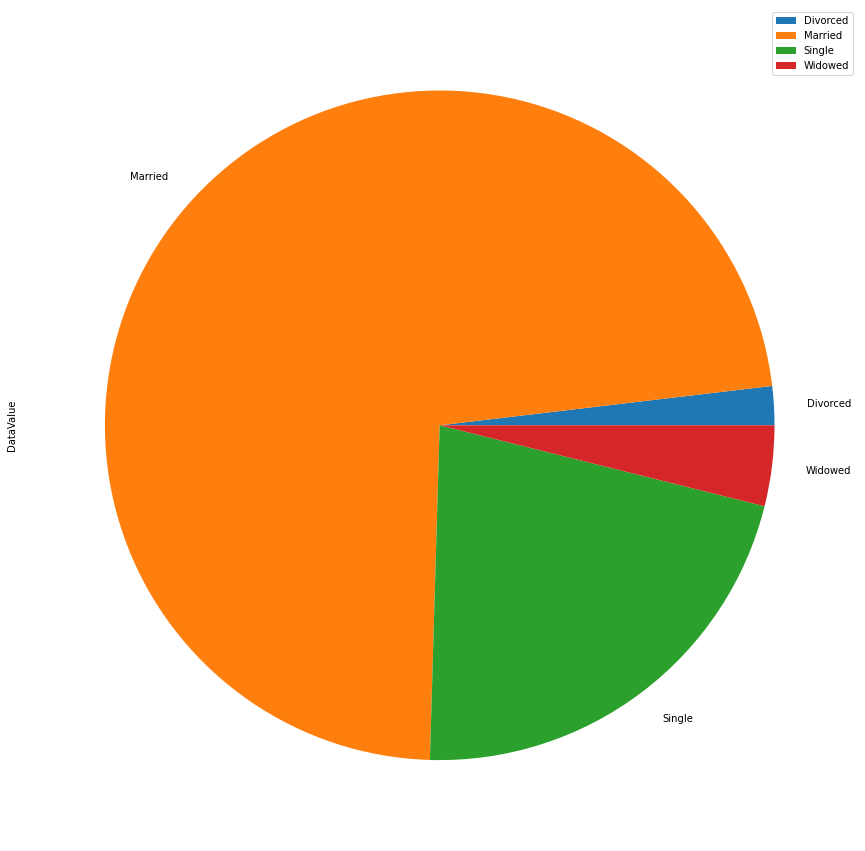

In [ ]:
data = marital_status[['MaritalStatus', 'DataValue']].copy()
data = data \
  .groupby('MaritalStatus').mean()

data \
  .plot(kind='pie', y='DataValue', figsize=(15,30))

In [ ]:
data = marital_status[['AgeGroup', 'MaritalStatus', 'DataValue']].copy()

data = data \
  .groupby(['AgeGroup', 'MaritalStatus']).mean() \
  .reset_index() \
  .pivot(index='AgeGroup', columns='MaritalStatus', values='DataValue') \
  .reset_index()

data['Total'] = data['Divorced'] + data['Married'] + data['Single'] + data['Widowed'] 

data = data[['AgeGroup', 'Single', 'Married', 'Divorced', 'Widowed', 'Total']]

data

MaritalStatus,AgeGroup,Single,Married,Divorced,Widowed,Total
0,[15-19],98.215,1.730,0.035,0.015,99.995
1,[20-24],79.575,20.130,0.245,0.045,99.995
2,[25-29],34.325,64.325,1.280,0.075,100.005
3,[30-34],10.990,86.245,2.550,0.215,100.000
4,[35-39],4.505,91.805,3.265,0.420,99.995
5,[40-44],2.575,93.240,3.335,0.850,100.000
6,[45-49],1.775,93.715,2.835,1.675,100.000
7,[50-54],1.270,93.085,2.525,3.125,100.005
8,[55-59],1.190,90.975,2.205,5.625,99.995
9,[60-64],1.365,87.990,1.425,9.215,99.995


In [ ]:
from plotly.subplots import make_subplots


In [ ]:
fig = go.Figure()

fig = make_subplots(rows=2, cols=2, subplot_titles=("Single", "Married", "Divorced", "Widowed"))

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Total'],
    mode='none', fillcolor='lightblue', fill='tozeroy' 
  ), row=1, col=1
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Single'],
    mode='none', fillcolor='green', fill='tozeroy' 
  ), row=1, col=1
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Total'],
    mode='none', fillcolor='lightblue', fill='tozeroy' 
  ), row=1, col=2
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Married'],
    mode='none', fillcolor='green', fill='tozeroy' 
  ), row=1, col=2
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Total'],
    mode='none', fillcolor='lightblue', fill='tozeroy' 
  ), row=2, col=1
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Divorced'],
    mode='none', fillcolor='green', fill='tozeroy' 
  ), row=2, col=1
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Total'],
    mode='none', fillcolor='lightblue', fill='tozeroy' 
  ), row=2, col=2
)

fig.add_trace(go.Scatter(
    x=data['AgeGroup'], y=data['Widowed'],
    mode='none', fillcolor='green', fill='tozeroy' 
  ), row=2, col=2
)


fig.update(layout_showlegend=False)
fig.show()